# The Membrane Model

Ohm'a law:

> $I = {V \over R} = g V$

condactance $g = {1 \over R}$

At a moment in time the current through a single channel can be written as 

> $I_K = -g_K (V - V_K)$

where the sign indicates the direction (inside/outside), and $V_K$ the Nernst potential. $(V - V_K)$ represents the driving force accross the membrane.

For all ions in the system

> $I_{ion} = \sum I_i = \sum -g_i (V - V_i) = -g_K (V - V_K) + -g_{Na} (V - V_{Na}) + ...$

Assuming the membrane acts as a capacitor

> $I_{cap} = C{dV \over dt}$

where $C$ is the capacitance af the membrane ond $V$ the membrane potential betweenthe inside and outside. Applying [Kirchoff's law]() of charge conservation dictates that the capacitive current should equal the ionic current and any other applied (experimental) current.

> $I_{cap} = I_{ion} + I_{app}$

which expands to 

> $C{dV \over dt} = \sum -g_i (V - V_i) + I_{app}$

# Activation and Inactivation Gates

For a voltage-dependent activation and inactivation of gates, where $k^+$ is the rate of gate opening and $k^-$ the rate of gate closing

\begin{equation*}
   {df_O \over dt} = {f_O - f_\infty \over \tau}
\end{equation*}

where 

\begin{align*}
   \tau &= {1\over k^- + k^+} \\
   f_\infty &= {k^+ \over k^- + k^+}
\end{align*}

According the the [Arrhenius expression](https://en.wikipedia.org/wiki/Arrhenius_equation) for rate constants, the membrane potential contributes to the energy barrier for these reactions

\begin{align*}
   k^+ &\propto \exp({-\Delta V^+\over RT}) \\
   k^- &\propto \exp({-\Delta V^-\over RT})
\end{align*}

hence the rate constants have the form

\begin{align*}
   k^+ &= k^+_o \exp(-\alpha V) \\
   k^- &= k^-_o \exp(-\beta V)
   
\end{align*}

where $k^+$ and $k^-$ are independent of $V$. By substitution, we get

\begin{align*}
   f_\infty &= {1\over 1 + k^-_o/k^+_o \exp((\alpha - \beta)V)} \\
   \tau &= {1\over k^+_o \exp(-\alpha V)}\cdot {1 \over 1 + k^-_o/k^+_o \exp((\alpha - \beta)V)}
\end{align*}

We then define

\begin{align*}
   S_o &= {1\over \beta - \alpha} \\
   V_o &= {\ln(k^-_o/k^+_o) \over \beta - \alpha}
\end{align*}

Substituting $S_o$ and $V_o$ we get

\begin{align*}
   f_\infty &= {1\over 1 + \exp(-(V - V_o)/S_o)} \\
   \tau &= {\exp(\alpha V)\over k^+_o}\cdot {1 \over 1 + \exp(-(V - V_o)/S_o)}
\end{align*}

Finally, both expressions can be writen as hyperbolic functions

\begin{align*}
   f_\infty &= 0.5 (1 + \tanh((V - V_o)/2S_o)) \\
   \tau &= {\exp(V(\alpha + \beta)/2) \over 2 \sqrt{k^+_ok^-_o}\cosh((V - V_o)/2S_o)}
\end{align*}

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

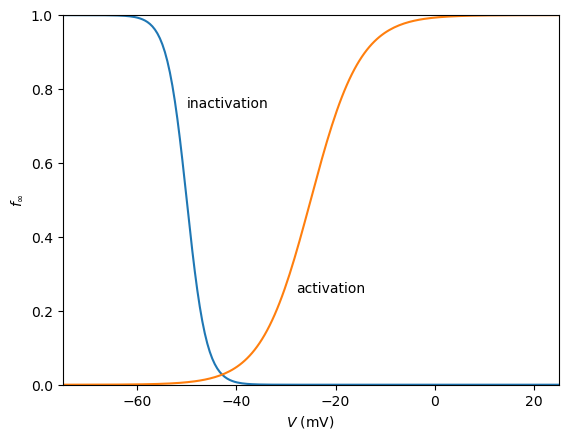

In [2]:
def f_inf(V, V0, S0):
    return 0.5 * (1 + math.tanh((V - V0)/(2*S0)))

V = np.linspace(-75, 25, 200)
f_inactive = [f_inf(x, -50,-2) for x in V]
f_active = [f_inf(x, -25,5) for x in V]
plt.plot(V, f_inactive)  
plt.plot(V, f_active) 
plt.xlabel(r'$V$ (mV)')
plt.ylabel(r'$f_\infty$')
plt.annotate('inactivation', (-50, 0.75))
plt.annotate('activation', (-28, 0.25))
plt.xlim(-75,25)
plt.ylim(0,1)
plt.show()

$f_{\infty}$ give the fraction of open channels at equilibrium at a specifiv membrane potential $V$. 

Inactivation gates tend to close when the membrane is depolarised while activation gates tend to open when the membrane is polarised. ACtivation or inactivatin is detemerined by the sign of $S_o$, positive implies activation, negative implies inactivation.

Also, $S_o$ determines the steepness of the dependence of $f_{\infty}$ on the potential $V$, while the $V_o$ determines the voltage at which half the channels are open.

To plot $\tau$ we assume the rates of opening and closing of the channels is equal so that $\alpha$ = $-\beta$. We also assume $2\sqrt{k^+_ok^-_o} = 0.2\;\text{ms}^{-1}$. When $\alpha$ = $-\beta$ and $\phi = 1/(2\sqrt{k^+_ok^-_o})$,

\begin{equation}
    \tau = {\phi \over\cosh((V - V_o)/2S_o)}
\end{equation}

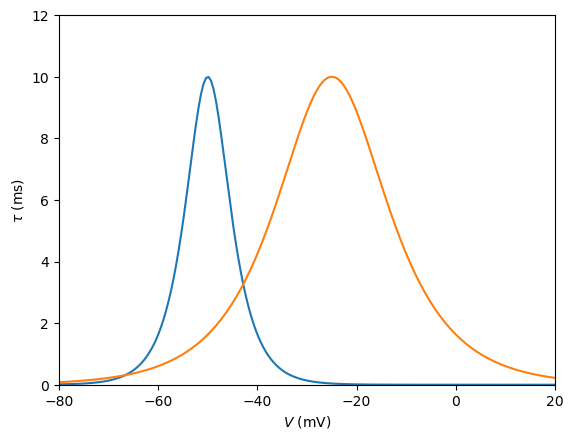

In [7]:
def tau(V, V0, S0):
    return (1/0.1)/(math.cosh((V - V0)/(2*S0)))

V = np.linspace(-80, 20, 200)
t_inactive = [tau(x, -50, -2) for x in V]
t_active = [tau(x, -25, 5) for x in V]
plt.plot(V, t_inactive)  
plt.plot(V, t_active) 
plt.xlabel(r'$V$ (mV)')
plt.ylabel(r'$\tau$ (ms)')
plt.xlim(-80, 20)
plt.ylim(0,12)
plt.show()

The width of the relxation times $\tau$ are determined by $S_o$ and peak at around $V_o$.

# Voltage Clamp Experiments

Consider a membrane with a single gated ion channel. The conductance at any one time $g$ is equal to the total conductance, $\bar{g}$ multiplied by the fraction of open channels $f_O$ in the membrane

\begin{equation*}
    g = f_O \bar{g}
\end{equation*}

which can be substituted into the equation for membrane capacitance

\begin{equation*}
    C{dV \over dt} = f_O \bar{g}(V - V_{rev}) + I_{app}
\end{equation*}

where $V_{rev}$ is the reversal potential determined by the Nernst equation

By applying a current equal and opposite top the current flowing through the membrane such that

\begin{equation*}
    I_{app} = \bar{g}\xi(V - V_{rev})
\end{equation*}

the right hand side is thus zero and the voltage is constant. Because the voltage is constant, let $\xi = f_O$. We see that the time dependence of the applied current comes only from the dependence of $f_O$ on $t$ as shown previously

\begin{equation*}
    {d\xi\over dt} = {-(f_O - f_{\infty})\over \tau}
\end{equation*}

Thus the time dependence of applied current provides a direct measurement of the gated current at a fixed voltage.

to perform a voltage clamp experiment, all but one type of channel must be disabled. this can be done pharmocologically. Tetrodotoxin (TTX) blocks NA+ channels.

To simulate the volatge clamp experiment, we solve $d\xi\over dt$ as

\begin{equation*}
    \xi(t) = f_{\infty} + (f_O(0) - f_{\infty})e^{-t/\tau}
\end{equation*}

and calculate the current over time for various test potentials. $\tau$ and $f_{\infty}$ are described in the membrane model.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math

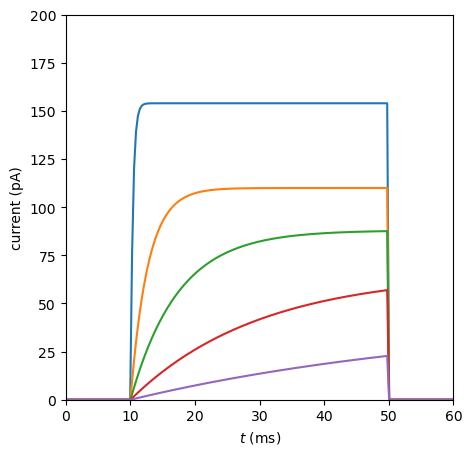

In [75]:
def xi_dt(t, f0, V):
    V0 = -60
    S0 = 0.2
    phi = 1/0.005
    f = 0.5*(1 + math.tanh((V - V0)/2*S0))
    tau = phi/(math.cosh((V - V0)/2*S0))
    return (f + (f0 - f)*math.e**(-t/tau))

def I_app(t, f0, V):
    g = 2.2
    Vrev = -60
    return g *xi_dt(t, f0, V) * (V - Vrev)

t = np.linspace(0,60,200)
def voltage_clamp(test_voltage):
    dat = []
    for x in t:
        if x < 10:
            dat.append(I_app(x, 0, -60))
        elif x < 50:
            dat.append(I_app(x-10, 0, test_voltage))
        else:
            dat.append(I_app(x-50, xi_dt(40, 0, test_voltage), -60))
    return dat

fig, ax = plt.subplots()
fig.set_size_inches(5,5)
plt.plot(t, voltage_clamp(10)) 
plt.plot(t, voltage_clamp(-10)) 
plt.plot(t, voltage_clamp(-20)) 
plt.plot(t, voltage_clamp(-30)) 
plt.plot(t, voltage_clamp(-40)) 
plt.ylim(0,200)
plt.xlim(0,60)
plt.xlabel('$t$ (ms)')
plt.ylabel('current (pA)')

plt.show()

Simulation of a voltage clamp experiment resulting from 40 ms of depolarsation from the holding/resting potential of -60 mV to the tes potential. The increase in current at the test potential is governed by the increase in $f_O$ which has a characteristic time $\tau(V_{test})$. When the test voltage returns to the resting potential (holding potential) there is a *tail current* which is characterised by $\tau(-60 mV)$ (This is not so evident in these figures, but can be seen by simulating the tail current on its own).

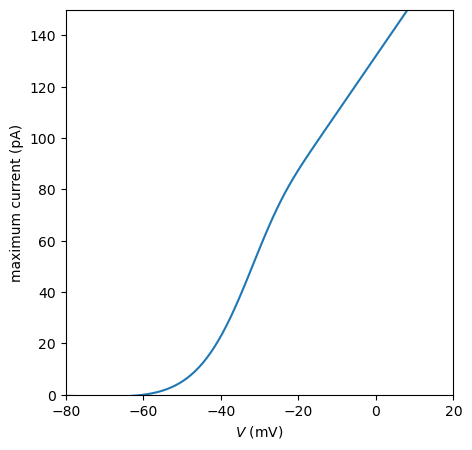

In [72]:
Voltage = np.linspace(-80, 20, 100)
I_ss = [I_app(40, 0, x) for x in Voltage]

fig, ax = plt.subplots()
plt.plot(Voltage,I_ss)
plt.xlim(-80, 20)
plt.ylim(0,150)
plt.xlabel('$V$ (mV)')
plt.ylabel('maximum current (pA)')
fig.set_size_inches(5,5)

plt.show()

This plot shows the steady state current at various test potentials. It can be expressed as $I = gf_{\infty}(V - V_{rev})$. When V is large enough, $f_{\infty} \approx 1$ and the function is linear. The curvature at lower potentials are a result of the $f_{\infty}$ activation function. The current is said to *rectify*. The delay in the onset of the maximun current is determined by $\tau$ and hence this channel type simulated here is refered to as a *delayed rectifier*.

The same can be done using Scipy to solve the ODE

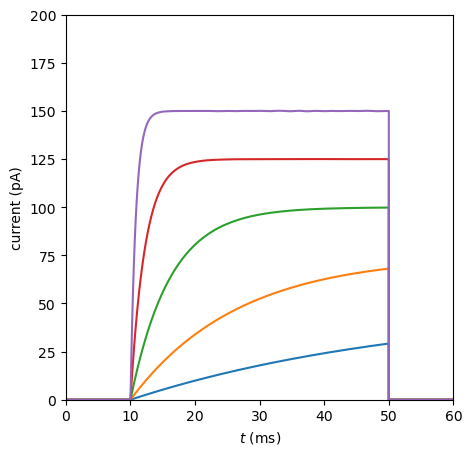

In [82]:
from scipy.integrate import odeint, solve_ivp

def fOpen(t, vars, V, V0):
    f0 = vars
    S0 = 0.2
    f = 0.5*(1 + math.tanh((V - V0)/2*S0))
    tau = (1/0.006)/(math.cosh((V - V0)/2*S0))
    dfdt = -(f0 - f)/tau
    return dfdt

def patch_clamp_exp(test_voltage):
    vars0 = [0]
    g = 2.5
    ssCurrent = []

    t_initial = np.linspace(0, 10, 10)
    initial_sol = solve_ivp(fOpen, [0,10], vars0, args=(-60, -60), dense_output=True)
    output_initial = g * initial_sol.sol(t_initial) * (-60 -(-60))

    plot_sols = []
    t = np.linspace(0, 40, 300)
    for v in test_voltage:
        vars0 = [0]
        sol = solve_ivp(fOpen, [0,40], vars0, args=(v, -60), dense_output=True)
        ft = g * sol.sol(t) * (v -(-60))

        vars0 = sol.sol(t[-1])
        ssCurrent.append(vars0)
        t_relaxation = np.linspace(0, 10, 100)
        relaxation_sol = solve_ivp(fOpen, [0,50], vars0, args=(v, -60), dense_output=True)
        output_relaxation = g * relaxation_sol.sol(t_relaxation) * (-60 -(-60))

        appended = np.append(output_initial,ft)
        tc = np.append(appended, output_relaxation)
        plot_sols.append(tc)


    time = np.append(t_initial, t + t_initial[-1])
    t_tc = np.append(time,t_relaxation + time[-1])

    fig, ax = plt.subplots()
    fig.set_size_inches(5,5)
    plt.ylim(0,200)
    plt.xlim(0,60)
    plt.xlabel('$t$ (ms)')
    plt.ylabel('current (pA)')
    
    for sols in plot_sols:
        plt.plot(t_tc, sols.T)
    

patch_clamp_exp([-40, -30, -20, -10, 0])